In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [11]:
from sklearn.datasets import make_blobs

In [43]:
X, Y = make_blobs(n_samples = 1000, n_features = 2, centers = 5, random_state = 10)

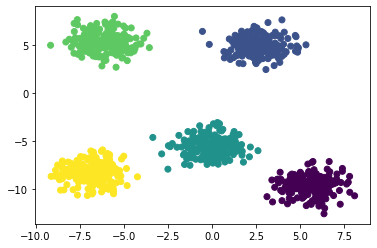

In [44]:
plt.scatter(X[:,0],X[:,1],c=Y)
plt.show()

In [45]:
#Kmeans Implementation

In [46]:
#initial preparation
k = 5
color = ["green","red","blue","yellow","gray"]
clusters = {}
for i in range(k):
    #Step 1: Initialize centers randomly
    center = 10*(2*np.random.random((X.shape[1],))-1)
    points =[]
    cluster = {
        'center':center,
        'points':points,
        'color':color[i]
    }
    clusters[i] = cluster

In [47]:
def distance(v1,v2):
    return np.sqrt(np.sum((v1-v2)**2))

In [48]:
#Step 2:
#Assign every data point to one of its clusters
#(EM Algorith - Expectation Maximization Algorithm)
#E - step 
def assignPoint(clusters):
    for i in range(X.shape[0]):
        dist = []
        curr_x = X[i]
        for j in range(k):
            d = distance(curr_x,clusters[j]['center'])
            dist.append(d)
            
        #minimum distance
        current_cluster = np.argmin(dist)
        clusters[current_cluster]['points'].append(curr_x)

In [49]:
#step 3
#update cluster center according to the mean value of the data points
#M - step

In [50]:
def updateClusterCenter(clusters):
    for i in range(k):
        pts = np.array(clusters[i]['points'])
        #calculate mean value based on the row
        if pts.shape[0]>0:
            mu = pts.mean(axis = 0)
            clusters[i]['center'] = mu
            clusters[i]['points'] = [] #clear the list

In [51]:
def plotClusters(clusters):
    for i in range(k):
        pts = np.array(clusters[i]['points'])
        #plot the point
        try:
            plt.scatter(pts[:,0],pts[:,1],color = clusters[i]['color'])
        except:
            pass
        #plot the cluster center
        uk = clusters[i]['center']
        plt.scatter(uk[0],uk[1],color='black',marker='*')

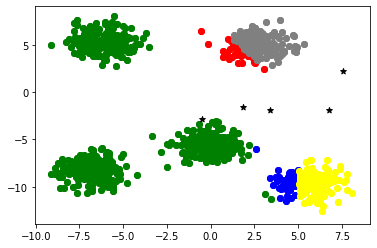

In [54]:
assignPoint(clusters)
plotClusters(clusters)

In [55]:
#Repeat these three function few times
count = 1
while(True):
    assignPoint(clusters)
    updateClusterCenter(clusters)
    count += 1
    if count>100:
        break
        

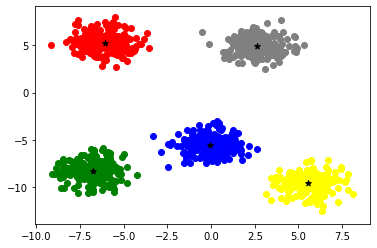

In [57]:
assignPoint(clusters)
plotClusters(clusters)

# K means clustering can fail in complex datasets

In [58]:
from sklearn.datasets import make_moons

In [73]:
X,Y = make_moons(n_samples = 200, noise = 0.10 )

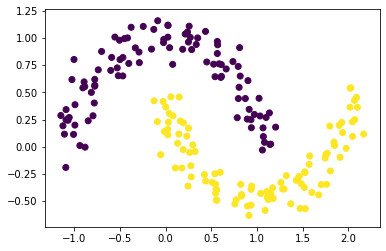

In [75]:
plt.scatter(X[:,0],X[:,1],c=Y)
plt.show()

In [76]:
from sklearn.cluster import KMeans

In [77]:
km = KMeans(n_clusters = 2)

In [78]:
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [79]:
centers = km.cluster_centers_
label = km.labels_

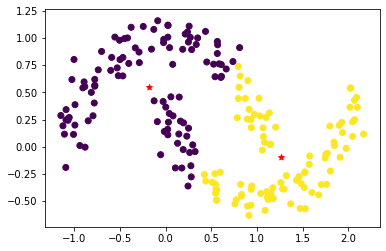

In [80]:
plt.scatter(X[:,0],X[:,1],c=label)
plt.scatter(centers[:,0],centers[:,1],color = 'red',marker='*')
plt.show()

# For Complex datasets we will use DBSCAN

DBSCAN - Density Based Spatial Clustering of Application with Noise

In [81]:
from sklearn.cluster import DBSCAN

In [122]:
dbs = DBSCAN(eps = 0.26,min_samples=5)

In [123]:
dbs.fit(X)

DBSCAN(algorithm='auto', eps=0.26, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

In [124]:
ybs = dbs.fit_predict(X)

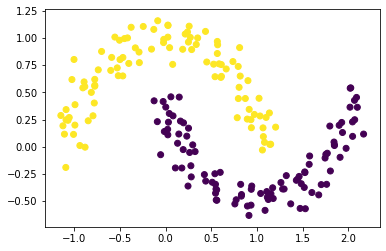

In [125]:
plt.scatter(X[:,0],X[:,1],c = ybs)
plt.show()